## A Quick Review of Linear Regression

*[Coding along with Python for Algorithmic Trading, Yves Hilpisch, O'Reilly, 1st edition November 2020, ISBN-13: 978-1492053354; Quant Platform at [https://py4at.pqp.io](https://py4at.pqp.io)]*

"__Ordinary least squares (OLS) regression__ is an optimization strategy that helps you find a straight line as close as possible to your data points in a linear regression model. OLS is considered the most useful optimization strategy for linear regression models as it can help you find unbiased real value estimates for your alpha and beta" ([builtin.com](https://builtin.com/data-science/ols-regression)).

Ordinary least squares (OLS) and linear regression are statistical methods that have been used for prediction purposes in different application areas.

#### __A Quick Review of Linear Regression based on Randomized Data:__

1. Generating a ndarray object with `NumPy` for an independent variable x
2. Generating randomized data ("noisy data") for a independent variable y, based on variable x
3. Implementing OLS regression based on simple monomials with with the `NumPy`functions `polyfit` and `polyval`
   - The highest degree for the monomials to be used is set to 1
4. Plotting the data and the regression line

In [119]:
import os
import random
import numpy as np
from pylab import mpl, plt # imports matplotlib
plt.style.use("seaborn-v0_8")
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif' # imports and configures the plotting package
os.environ['PYTHONHASHSEED'] = '0'

In [120]:
# generating an evenly spaced grid of floats for the x values between 0 and 10
x = np.linspace(0, 10)
x

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

#### <span style="color: green; line-height: 1.5;">__*Claude.ai*, what is the numpy function np.linspace doing?__</span>

> Let me explain the `np.linspace()` function in NumPy:
> 
> `np.linspace()` is a function used to create an array of evenly spaced numbers over a specified interval. Its basic syntax is:
> 
> ```python
> np.linspace(start, stop, num=50, endpoint=True)
> ```
> 
> Here's a breakdown of its parameters:
> - `start`: The starting value of the sequence
> - `stop`: The end value of the sequence
> - `num`: The number of samples to generate (default is 50)
> - `endpoint`: Whether to include the stop value (default is True)
> 
> Here's an example to illustrate:
> 
> ```python
> import numpy as np
> 
> # Create 5 evenly spaced points between 0 and 10
> print(np.linspace(0, 10, num=5))
> # Output: [ 0.   2.5  5.   7.5 10. ]
> 
> # If you don't want the endpoint
> print(np.linspace(0, 10, num=5, endpoint=False))
> # Output: [0. 2. 4. 6. 8.]
> ```
> 
> This function is particularly useful in:
> - Creating evenly spaced points for plotting
> - Generating sample points for mathematical functions
> - Creating test data for numerical computations
> 
> It's different from `np.arange()` because `linspace()` guarantees the number of points you specify, while `arange()` creates points based on a step size.
> 

In [121]:
# fixing the seed values for the relevant random number generators
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
set_seeds() # fixes the seed values for the relevant random number generators

In [122]:
# generating the randomized data for y values
y = x + np.random.standard_normal(len(x))
y

array([-1.74976547,  0.54676204,  1.56119907,  0.35980886,  1.79764732,
        1.534627  ,  1.44566947,  0.3585281 ,  1.44315723,  2.09173614,
        1.58278934,  2.68006145,  1.86538454,  3.4699083 ,  3.52986366,
        2.95681335,  2.73402575,  4.49912044,  3.23533377,  2.75923277,
        5.70061431,  5.82731946,  4.23791678,  3.85144181,  5.08247787,
        6.03912302,  6.03712279,  6.87176021,  5.38804766,  5.97404336,
        6.34484859,  4.88331362,  5.77425994,  7.55114789,  7.68922027,
        6.68691022,  8.53656104,  5.86040358,  6.39870299,  6.72674916,
        7.61882614,  7.6991752 ,  8.57874313,  8.16257147, 10.27933991,
        7.45057785,  8.404445  ,  9.94934449,  8.18233986, 11.47071387])

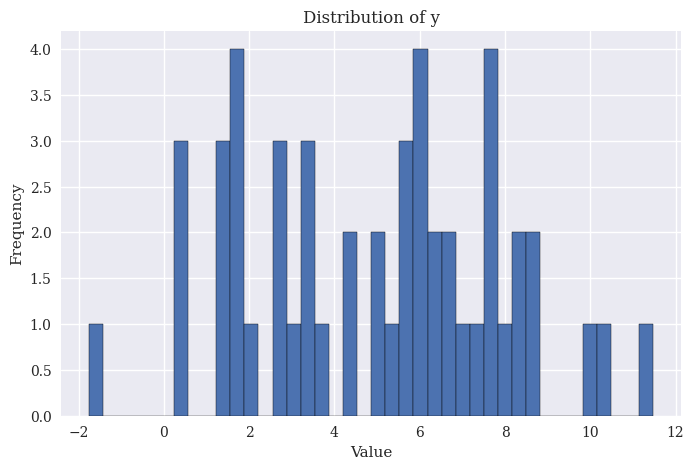

In [123]:
# just for demonstration purpose: a histogram of y
plt.figure(figsize=(8, 5))
plt.hist(y, bins=40, edgecolor='black')  # Changed to 20 bins
plt.title('Distribution of y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [124]:
# OLS regression of degree 1
reg = np.polyfit(x, y, deg=1)
reg # shows the optimal parameter values

array([0.94612934, 0.22855261])

#### <span style="color: green; line-height: 1.5;">__*Claude.ai*, is OLS regression the same as linear regression?__</span>

> OLS (Ordinary Least Squares) regression is a specific method of performing linear regression, so they are closely related but not exactly the same.
> 
> Here's a more detailed explanation:
> 
> Linear regression is a broader statistical approach used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data.
> 
> OLS regression is the most common method of estimating the parameters (coefficients) in a linear regression model. It works by minimizing the sum of the squared vertical distances between the observed values and the predicted values from the linear model.
> 
> Key characteristics of OLS regression:
> - Finds the line of best fit by minimizing the squared residuals
> - Assumes a linear relationship between variables
> - Provides estimates for the coefficients that best explain the relationship
> - Commonly used when you want to predict a continuous outcome variable
> 
> In practice, when most people say "linear regression," they are typically referring to OLS regression. However, there are other methods for linear regression (like generalized least squares) that differ from OLS in how they estimate parameters.
> 
> A simple example in Python using statsmodels:
> 
> ```python
> import numpy as np
> import statsmodels.api as sm
> 
> # Create sample data
> X = np.random.rand(100, 1)
> y = 2 + 3 * X + np.random.randn(100, 1)
> 
> # Add a constant term for the intercept
> X = sm.add_constant(X)
> 
> # Fit OLS regression
> model = sm.OLS(y, X).fit()
> 
> # Print summary
> print(model.summary())
> ```
> 

#### <span style="color: green; line-height: 1.5;">__*Claude.ai*, in the context of the last question, can you please explain the numpy function np.polyfit(x, y, deg=1), with x being the independent and y being the dependent variable? I'm especially interested in the meaning of the degree parameter.__</span>

> Let me explain `np.polyfit()`:
> 
> `np.polyfit(x, y, deg=1)` is a NumPy function used to perform polynomial regression. It finds the coefficients of a polynomial that best fits the given data points.
> 
> Here's a breakdown:
> - `x`: Independent variable (input data)
> - `y`: Dependent variable (output data)
> - `deg`: The degree of the polynomial to fit
> 
> The degree parameter determines the complexity of the fitting polynomial:
> - `deg=1`: Linear regression (straight line)
> - `deg=2`: Quadratic regression (parabola)
> - `deg=3`: Cubic regression (S-shaped curve)
> - And so on...
> 
> Example:
> 
> ```python
> import numpy as np
> import matplotlib.pyplot as plt
> 
> # Linear fit (degree 1)
> x = np.array([1, 2, 3, 4, 5])
> y = np.array([2, 4, 5, 4, 5])
> 
> # Fit a 1st-degree polynomial (line)
> coeffs = np.polyfit(x, y, deg=1)
> # coeffs[0] is slope, coeffs[1] is y-intercept
> 
> # Quadratic fit (degree 2)
> quad_coeffs = np.polyfit(x, y, deg=2)
> 
> # Plot the original data and fits
> plt.scatter(x, y, label='Original Data')
> plt.plot(x, np.polyval(coeffs, x), color='red', label='Linear Fit')
> plt.plot(x, np.polyval(quad_coeffs, x), color='green', label='Quadratic Fit')
> plt.legend()
> plt.show()
> ```
> 
> The function returns an array of polynomial coefficients, ordered from highest degree to lowest. So for a linear fit (degree 1), it returns `[slope, intercept]`.
> 

#### <span style="color: green; line-height: 1.5;">__*Claude.ai*, what is polynomial regression?__</span>

> Polynomial regression is a form of regression analysis where the relationship between the independent variable x and the dependent variable y is modeled as an nth-degree polynomial. Unlike linear regression, which fits a straight line, polynomial regression can capture more complex, curved relationships between variables.
> 
> Basic concept:
> - Instead of a linear equation (y = mx + b)
> - Uses a polynomial equation (y = a0 + a1x + a2x² + a3x³ + ...)
> 
> Example comparison:
> - Linear regression: y = 2x + 3
> - Quadratic (degree 2): y = 2x² + 3x + 1
> - Cubic (degree 3): y = x³ + 2x² + 3x + 1
> 
> Practical illustration:
> ```python
> import numpy as np
> import matplotlib.pyplot as plt
> 
> # Generate some non-linear data
> x = np.linspace(0, 10, 100)
> y = 2 + 0.5 * x**2 + np.random.normal(0, 5, 100)
> 
> # Fit different degree polynomials
> linear_fit = np.polyfit(x, y, deg=1)
> quad_fit = np.polyfit(x, y, deg=2)
> cubic_fit = np.polyfit(x, y, deg=3)
> 
> # Plot original data and fits
> plt.scatter(x, y, label='Original Data')
> plt.plot(x, np.polyval(linear_fit, x), color='red', label='Linear Fit')
> plt.plot(x, np.polyval(quad_fit, x), color='green', label='Quadratic Fit')
> plt.plot(x, np.polyval(cubic_fit, x), color='blue', label='Cubic Fit')
> plt.legend()
> plt.show()
> ```
> 
> Use cases:
> - Modeling growth curves
> - Economic forecasting
> - Scientific data with non-linear relationships
> - Engineering and physics applications
> 
> Caution:
> - Higher degree polynomials can overfit
> - Always validate with test data
> - Choose the simplest model that explains the data well
> 

In [125]:
# okay, so far we've OLS regression of degree 1
reg # the optimal parameter values

array([0.94612934, 0.22855261])

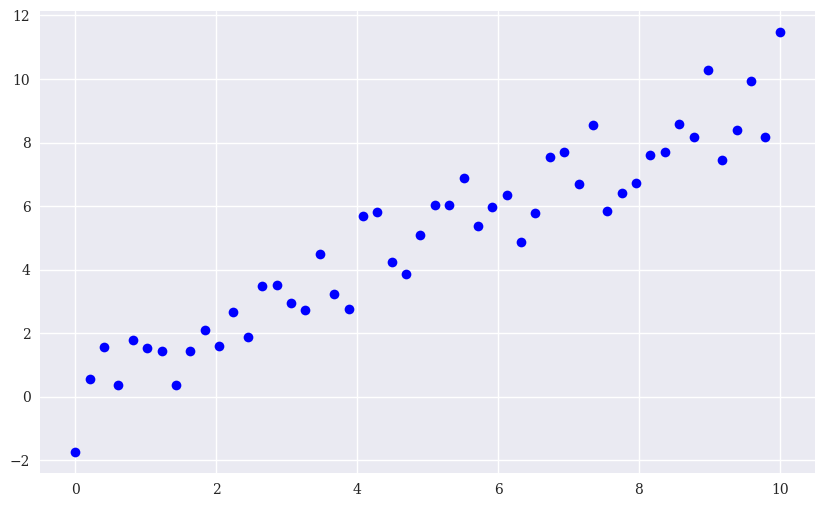

In [126]:
# let's create a figure plot out of this (8)
plt.figure(figsize=(10, 6))
# plotting the original data as dots (9)
plt.plot(x, y, 'bo', label='data')

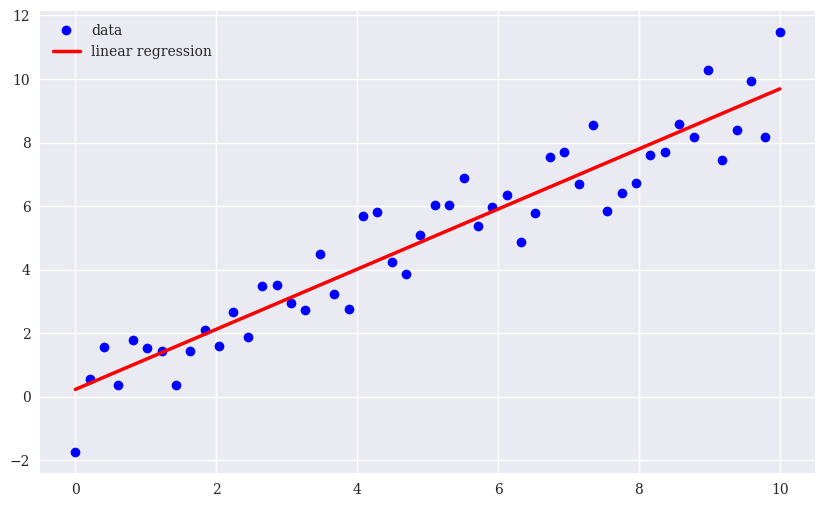

In [127]:
# let's create a figure plot out of this (8)
plt.figure(figsize=(10, 6))
# plotting the original data as dots (9)
plt.plot(x, y, 'bo', label='data')
# plotting the regression line (10)
plt.plot(x, np.polyval(reg, x), 'r', lw=2.5, label='linear regression')
# creating the legend (11)
plt.legend(loc=0)

The figure above shows __linear regression illustrated__ based on randomized data.

#### __Generating an enlarged domain for the x values__

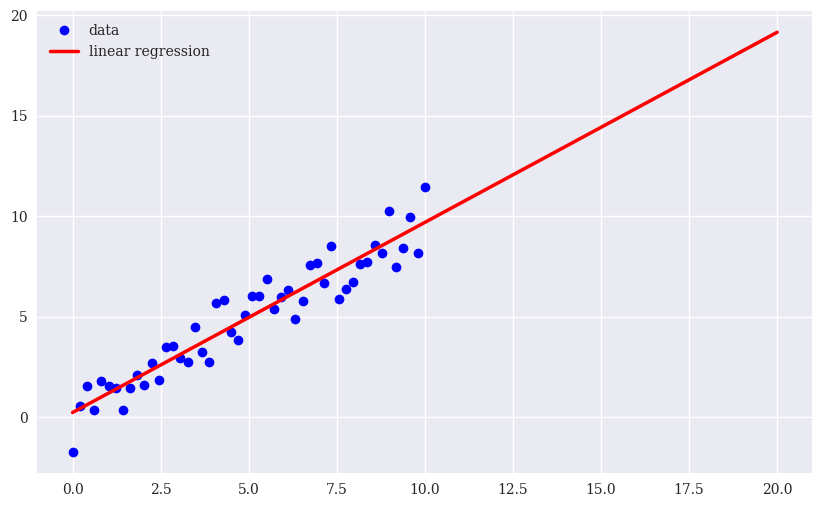

In [128]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
xn = np.linspace(0,20) # generates an enlarged domain for the x values
plt.plot(xn, np.polyval(reg, xn), 'r', lw=2.5, label='linear regression')
plt.legend(loc=0)

#### __The Basic Idea of Price Prediction__

time-based ordering of data becomes important if we want to predict the index level of the following day. To do this, historic index levels need to be in the correct order. 

If we have data in historically correct order, we could try to predict tomorrow's index level given today's index level. The number of days used as input is called ***lags*** (using the index level of the last three days would be ***three lags***). 

In [129]:
# code example for lags
x = np.arange(12)
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


__For example, let's assume three lags for the regression:__
- which implies three independent variables for the regression and one dependent one
- the first three values of the array, 0, 1 and 2, are the values of the three independent variables
- the fourth value, 3, would be the value of the dependent variable
- now we need to make a linear equation out of this like A * x = b
- here A is a matrix and x and b are vectors

In [130]:
lags = 3 # defines the number of lags
lags 

3

In [131]:
m = np.zeros((lags + 1, len(x) - lags)) # instantiates ndarray object with the appropriate dimensions
m

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [132]:
print("Matrix with", lags + 1, "rows and",  len(x) - lags, "columns")

Matrix with 4 rows and 9 columns


In [133]:
m[lags]

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [134]:
m[lags] = x[lags:] # defines the target value (dependent variable)

In [135]:
m[lags]

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [136]:
x[lags:]

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11])

In [137]:
m

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]])

In [138]:
# so far so good
# now we iterrate over the numbers from 0 to lags - 1
for i in range(lags):
    m[i] = x[i:i - lags] # defines basis vectors (independent variables)

In [139]:
m

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]])

In [140]:
m.T # the transpose of the ndarray object m

array([[ 0.,  1.,  2.,  3.],
       [ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.],
       [ 3.,  4.,  5.,  6.],
       [ 4.,  5.,  6.,  7.],
       [ 5.,  6.,  7.,  8.],
       [ 6.,  7.,  8.,  9.],
       [ 7.,  8.,  9., 10.],
       [ 8.,  9., 10., 11.]])

__The transposed ndarray object:__
- the first three columns contain the values for the three independent variables 
- the first three columns together form the matrix A 
- the fourth column represents the vector b (which is the dependent variable)
- as a result, linear regression yields the missing vector x ***(but how?)***

Just as reminder: above we said we need to make a linear equation like A * x = b

__Solving the general least-squares problem with NumPy's `linalg` package and the `lstsq` function:__

In [141]:
# np.linalg.lstsq(m[:lags].T, m[lags], rcond=None)

In [142]:
reg = np.linalg.lstsq(m[:lags].T, m[lags], rcond=None)[0] # implementing the OLS regression
reg # prints out the optimal parameters

array([-0.66666667,  0.33333333,  1.33333333])

In [143]:
np.dot(m[:lags].T, reg) # the dot product yielding the prdiction results

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])